     Neighborhood  Year Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
120  cherry-creek  2017  46  61  54  48  49  51  43  68  52  59  63  73
121  cherry-creek  2018  48  44  60  51  52  43  63  52  45  53  32  56
122  cherry-creek  2019  53  55  65  60  55  69  75  55  63  64  71  59
123  cherry-creek  2020  74  48  44  50  46  46  62  56  63  56  70  69
124  cherry-creek  2021  63  44  61  43  68  70  68  68  58  65  50  70
125  cherry-creek  2022  67  67  69  64  77  80  80  87   1   0   0   0
      Month  Crimes
0   2017-01      46
1   2017-02      61
2   2017-03      54
3   2017-04      48
4   2017-05      49
..      ...     ...
63  2022-04      64
64  2022-05      77
65  2022-06      80
66  2022-07      80
67  2022-08      87

[68 rows x 2 columns]


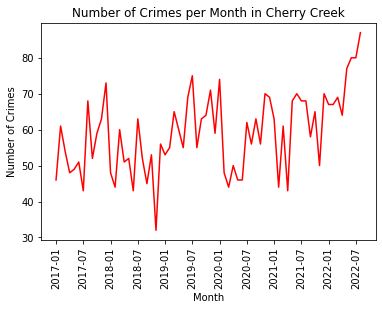

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in crime averages
df = pd.read_csv('../../../Housing_Data/CHECKPOINT_1/crime_avgs.csv')
# read in house averages
df2 = pd.read_csv('../../../Housing_Data/CHECKPOINT_1/house_avgs.csv')

# select only the cherry-creek neighborhood
df = df[df['Neighborhood'] == 'cherry-creek']

# select only the first 6 rows (2017-2022)
df = df.iloc[0:6]

# select only the cherry-creek neighborhood for df2
df2 = df2[df2['Neighborhood'] == 'cherry-creek']

# select only the first 6 rows (2017-2022)
df2 = df2.iloc[0:6]

# check the data
print(df)

# make a new dataframe with a row for each month from 2017-2022, such as 2017-01, 2017-02, etc. and a column for number of crimes
df3 = pd.DataFrame(columns=['Month', 'Crimes'])
df3['Month'] = pd.date_range(start='2017-01', end='2022-12', freq='MS')
df3['Crimes'] = np.nan
#change month column to 2017-01, 2017-02, etc.
df3['Month'] = df3['Month'].dt.strftime('%Y-%m')

# create a csv from df3 (manually fill the data in excel for each month, it's easier than doing it in python)
# ONLY NEED TO RUN THIS ONCE, THEN COMMENT OUT OR It WILL OVERWRITE THE FILE MAYBE IDK BUT PROBABLY
#df3.to_csv('crime_months_neighborhood.csv', index=False)

# STEPS TO FILL IN THE DATA IN EXCEL
# 1. open crime_months.csv or whatever the csv is called from the previous line
# 2. copy one row of data from df output here so you have 12 values with spaces in between
# 3. paste into a new column in excel, it'll all be in the same cell
# 4. Select the cell, Go to Data > Text to Columns > Delimited > Next > Under Delimiters choose the Space option > Finish
# 6. Select the horizontal cells, copy them
# 7. Select the 12 cells under crimes for the corresponding year, like the first 12 cells for 2017 data
# 8. Go back to Home on the top and click the arrow next to Paste, choose Transpose (the one with the arrows)
# 9. Delete the extra data that was pasted in originally
# 10. Repeat for all years

# read in the csv when done
df4 = pd.read_csv('crime_months_cherry-creek.csv')

# check the data

# delete the last 4 months of 2022 because they are not complete
df4 = df4.iloc[0:68]

# check the data
print(df4)


# create a plot for the number of crimes per month from 2017-2022
plt.plot(df4['Month'], df4['Crimes'], color='red')
plt.xticks(rotation=90)
plt.title('Number of Crimes per Month in Cherry Creek')
# make the x labels every 6 months
plt.xticks(np.arange(0, 69, 6))
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

plt.show()

      Month  House Prices
0   2017-01       1745131
1   2017-02       1769757
2   2017-03       1771831
3   2017-04       1769394
4   2017-05       1750005
..      ...           ...
66  2022-07       2908484
67  2022-08       3000542
68  2022-09       3267973
69  2022-10       3290468
70  2022-11       3347731

[71 rows x 2 columns]


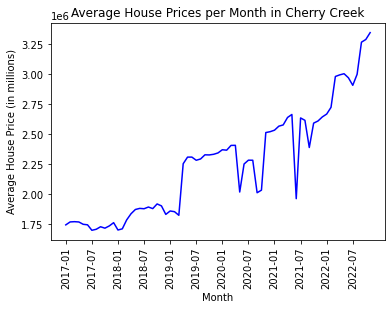

In [16]:
# read in the csv 
df4 = pd.read_csv('housing_months_cherry-creek.csv')

# check the data
print(df4)

# housing prices
plt.plot(df4['Month'], df4['House Prices'], color='blue')
plt.xticks(rotation=90)
plt.title('Average House Prices per Month in Cherry Creek')
# make the x labels every 6 months
plt.xticks(np.arange(0, 69, 6))
plt.xlabel('Month')
plt.ylabel('Average House Price (in millions)')

plt.show()

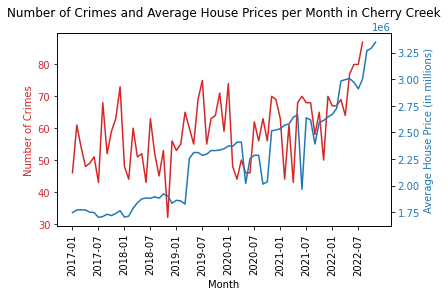

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

df5 = pd.read_csv('crime_months_cherry-creek.csv')

# check the data
# print(df5)

df6 = pd.read_csv('housing_months_cherry-creek.csv')

# check the data
# print(df6)

# same line plot for both housing and crime, with different colors and y axis labels
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Crimes', color=color)
ax1.plot(df5['Month'], df5['Crimes'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(np.arange(0, 69, 6))
# make the x labels more readabl
ax1.set_xticklabels(['2017-01', '2017-07', '2018-01', '2018-07', '2019-01', '2019-07', '2020-01', '2020-07', '2021-01', '2021-07', '2022-01', '2022-07'])
# make the x labels vertical
plt.xticks(rotation=90)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average House Price (in millions)', color=color)  # we already handled the x-label with ax1
ax2.plot(df6['Month'], df6['House Prices'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Number of Crimes and Average House Prices per Month in Cherry Creek')
plt.show()